# LDA and Logit Analysis

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas, scikit-learn

Software versions
Python 3.5.3 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 4.9.16 gentoo x86_64 with debian stretch sid
numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.0
pandas 0.19.2
scikit-learn 0.18.1
Fri May 05 16:05:39 2017 UTC

In [2]:
import os
import sys
sys.path.append("../src/")

from IPython.display import display
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from sklearn.externals import joblib
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from multioutput_chained import ChainedMultiOutputClassifier
from sklearn.preprocessing import scale
import ml_plots as mp
import scoring_functions as sf
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.3f}'.format
matplotlib.rcParams.update({'font.size': 12})

In [3]:
SCORES = [(sf.balanced, 0, 1.01)]
IN_OPTIONS = ['IN_CR', 'IN_CS', 'IN_DS', 'is_Table', 'is_Columnar', 
              'is_Int', 'is_Float', 'is_String', 'Type_Size', 'Chunk_Size',
              'Mean', 'Median', 'Sd', 'Skew', 'Kurt', 'Min', 'Max', 'Q1',
              'Q3', 'N_Streaks', 'BLZ_CRate', 'BLZ_CSpeed', 
              'BLZ_DSpeed', 'LZ4_CRate', 'LZ4_CSpeed', 'LZ4_DSpeed']
OUT_CODEC = ['Blosclz', 'Lz4', 'Lz4hc', 'Zstd']
OUT_FILTER = ['Noshuffle', 'Shuffle', 'Bitshuffle'] 
OUT_LEVELS = ['CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6', 'CL7', 'CL8', 'CL9']
OUT_BLOCKS = ['Block_8', 'Block_16', 'Block_32', 'Block_64', 'Block_128',
              'Block_256', 'Block_512', 'Block_1024', 'Block_2048']
OUT_OPTIONS = OUT_CODEC + OUT_FILTER + OUT_LEVELS + OUT_BLOCKS
CUSTOM3_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'N_Streaks', 'Max', 'Min']
CUSTOM2_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'Max', 'Min']
CUSTOM_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'BLZ_CSpeed']

In [4]:
df = pd.read_csv('../data/training_data.csv', sep='\t')
X, Y = scale(df[CUSTOM3_IN].values), df[OUT_OPTIONS].values

## LDA - Curva de aprendizaje

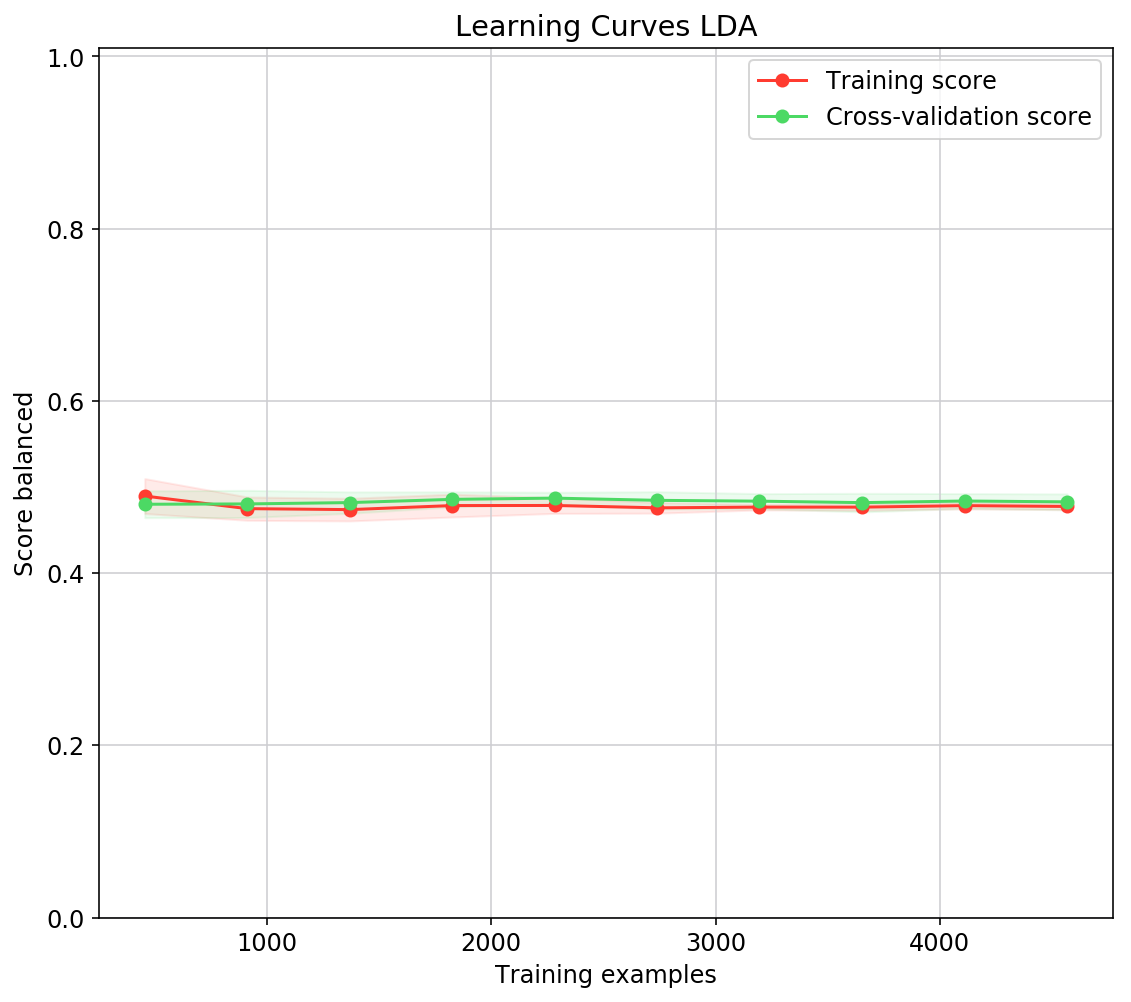

In [5]:
title = "Learning Curves LDA"
lda = MultiOutputClassifier(LinearDiscriminantAnalysis())
cv = ShuffleSplit(n_splits=10, test_size=0.1)
fig = plt.figure(figsize=(20,8))
n = 121
for score in SCORES:
    mp.plot_learning_curve(
        fig.add_subplot(n), lda, title, X, Y, scoring=score[0],
        ylim=(score[1], score[2]), cv=cv, n_jobs=-1,
        train_sizes=np.linspace(.1, 1.0, 10))
    n += 1

## LDA - Resultados

In [6]:
print('Normal')
cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=1)
lda = MultiOutputClassifier(LinearDiscriminantAnalysis())
display(mp.cross_val_report(lda, cv, X, Y, True))
print('Chained')
lda = ChainedMultiOutputClassifier(LinearDiscriminantAnalysis())
display(mp.cross_val_report(lda, cv, X, Y, True))

Normal


Name,Score
balanced,0.4796 +/-(0.0082)
brier,0.0000 +/-(0.0000)
normal,0.0610 +/-(0.0059)
codec,0.7032 +/-(0.0172)
filter_,0.5821 +/-(0.0085)
codec_filter,0.4138 +/-(0.0142)
c_level,0.1937 +/-(0.0105) ~ 0.5667 +/-(0.0051)
block,0.1455 +/-(0.0044) ~ 0.5241 +/-(0.0045)
cl_block,0.1029 +/-(0.0054) ~ 0.5454 +/-(0.0041)


Chained


Name,Score
balanced,0.6150 +/-(0.0110)
brier,0.0000 +/-(0.0000)
normal,0.1247 +/-(0.0089)
codec,0.7908 +/-(0.0064)
filter_,0.6708 +/-(0.0083)
codec_filter,0.5589 +/-(0.0130)
c_level,0.3127 +/-(0.0136) ~ 0.6129 +/-(0.0188)
block,0.3558 +/-(0.0116) ~ 0.7293 +/-(0.0105)
cl_block,0.1807 +/-(0.0105) ~ 0.6711 +/-(0.0139)


In [7]:
CUSTOM2_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'Max', 'Min']
X = scale(df[CUSTOM2_IN].values)
print('Normal')
lda = MultiOutputClassifier(LinearDiscriminantAnalysis())
display(mp.cross_val_report(lda, cv, X, Y, True))
print('Chained')
lda = ChainedMultiOutputClassifier(LinearDiscriminantAnalysis())
display(mp.cross_val_report(lda, cv, X, Y, True))

Normal


Name,Score
balanced,0.4778 +/-(0.0075)
brier,0.0000 +/-(0.0000)
normal,0.0597 +/-(0.0055)
codec,0.7048 +/-(0.0173)
filter_,0.5707 +/-(0.0083)
codec_filter,0.4106 +/-(0.0125)
c_level,0.1951 +/-(0.0116) ~ 0.5667 +/-(0.0050)
block,0.1376 +/-(0.0054) ~ 0.5231 +/-(0.0046)
cl_block,0.1029 +/-(0.0053) ~ 0.5449 +/-(0.0041)


Chained


Name,Score
balanced,0.6144 +/-(0.0079)
brier,0.0000 +/-(0.0000)
normal,0.1314 +/-(0.0087)
codec,0.7928 +/-(0.0069)
filter_,0.6611 +/-(0.0052)
codec_filter,0.5554 +/-(0.0083)
c_level,0.3186 +/-(0.0122) ~ 0.6156 +/-(0.0179)
block,0.3553 +/-(0.0137) ~ 0.7309 +/-(0.0101)
cl_block,0.1863 +/-(0.0090) ~ 0.6733 +/-(0.0130)


In [8]:
CUSTOM_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'BLZ_CSpeed']
X = scale(df[CUSTOM_IN].values)
print('Normal')
lda = MultiOutputClassifier(LinearDiscriminantAnalysis())
display(mp.cross_val_report(lda, cv, X, Y, True))
print('Chained')
lda = ChainedMultiOutputClassifier(LinearDiscriminantAnalysis())
display(mp.cross_val_report(lda, cv, X, Y, True))

Normal


Name,Score
balanced,0.4549 +/-(0.0092)
brier,0.0000 +/-(0.0000)
normal,0.0500 +/-(0.0059)
codec,0.7039 +/-(0.0150)
filter_,0.5250 +/-(0.0105)
codec_filter,0.3653 +/-(0.0156)
c_level,0.1825 +/-(0.0094) ~ 0.5669 +/-(0.0052)
block,0.1361 +/-(0.0054) ~ 0.5222 +/-(0.0049)
cl_block,0.1022 +/-(0.0038) ~ 0.5446 +/-(0.0043)


Chained


Name,Score
balanced,0.6016 +/-(0.0120)
brier,0.0000 +/-(0.0000)
normal,0.1209 +/-(0.0068)
codec,0.7943 +/-(0.0063)
filter_,0.6451 +/-(0.0092)
codec_filter,0.5316 +/-(0.0141)
c_level,0.3156 +/-(0.0139) ~ 0.6120 +/-(0.0249)
block,0.3574 +/-(0.0140) ~ 0.7311 +/-(0.0112)
cl_block,0.1867 +/-(0.0096) ~ 0.6715 +/-(0.0163)


## Logit - Curva de aprendizaje

In [9]:
df = pd.read_csv('../data/training_data.csv', sep='\t')
X, Y = scale(df[CUSTOM3_IN].values), df[OUT_OPTIONS].values

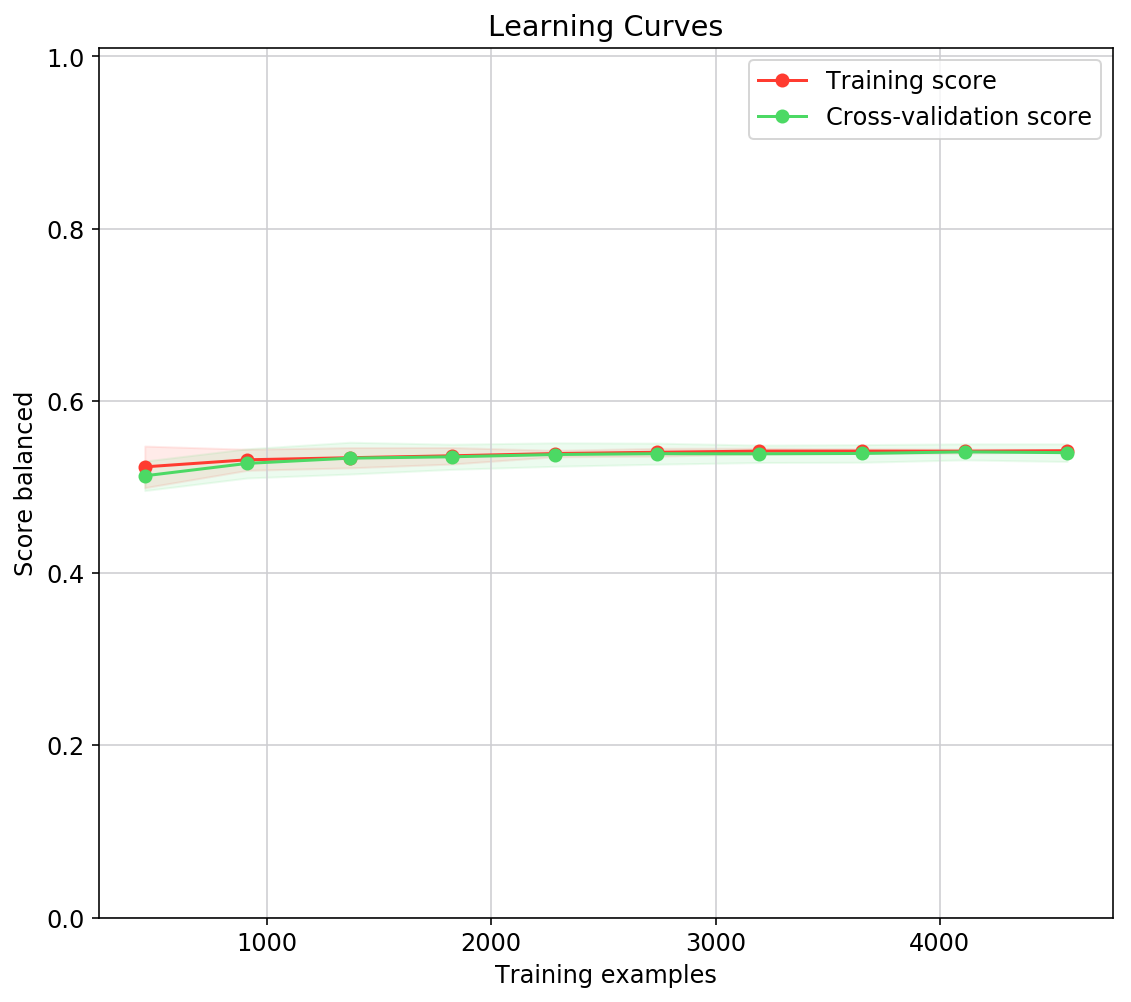

In [10]:
title = "Learning Curves"
lda = MultiOutputClassifier(LogisticRegression())
cv = ShuffleSplit(n_splits=10, test_size=0.1)
fig = plt.figure(figsize=(20,8))
n = 121
for score in SCORES:
    mp.plot_learning_curve(
        fig.add_subplot(n), lda, title, X, Y, scoring=score[0],
        ylim=(score[1], score[2]), cv=cv, n_jobs=-1,
        train_sizes=np.linspace(.1, 1.0, 10))
    n += 1

## Logit - Curva de validación

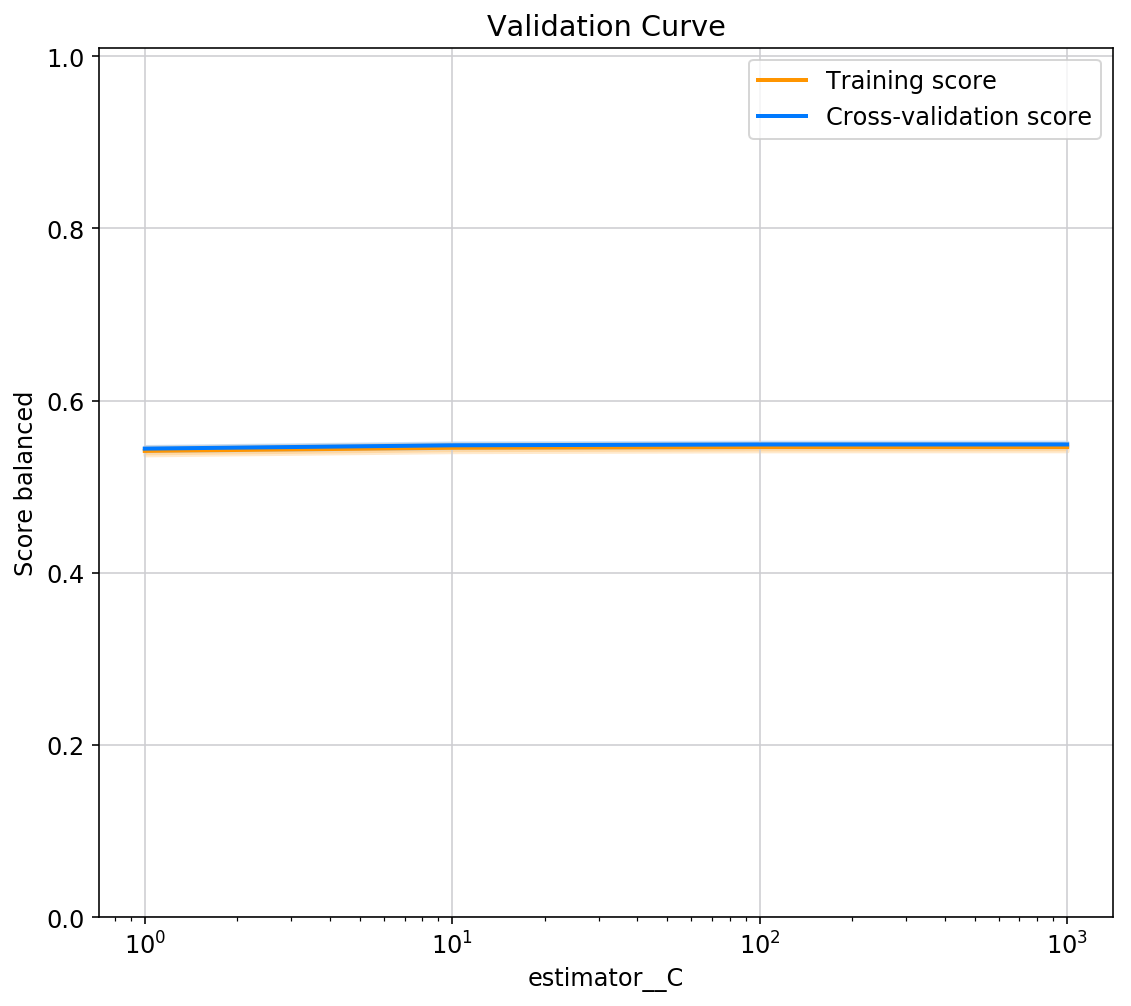

In [11]:
PARAM_NAMES = ['estimator__C']
PARAM_RANGES = [[1, 10, 100, 1000]]
cv = ShuffleSplit(n_splits=10, test_size=0.5)
clf = MultiOutputClassifier(LogisticRegression(solver='newton-cg'))
fig = plt.figure(figsize=(20, 8))
n = 121
for score in SCORES:
    ax = mp.plot_validation_curve(
        fig.add_subplot(n), clf, X, Y, param_name=PARAM_NAMES[0],
        param_range=PARAM_RANGES[0], cv=cv, scoring=score[0],
        ylim=(score[1], score[2]))
    ax.semilogx()
    n += 1

## Logit - Resultados

In [12]:
print('Normal')
clf = MultiOutputClassifier(LogisticRegression(solver='newton-cg'))
display(mp.cross_val_report(clf, cv, X, Y, True))
print('Chained')
clf = ChainedMultiOutputClassifier(LogisticRegression(solver='newton-cg'))
display(mp.cross_val_report(clf, cv, X, Y, True))

Normal


Name,Score
balanced,0.5397 +/-(0.0024)
brier,0.0000 +/-(0.0000)
normal,0.0810 +/-(0.0053)
codec,0.7857 +/-(0.0072)
filter_,0.6887 +/-(0.0069)
codec_filter,0.5394 +/-(0.0085)
c_level,0.1878 +/-(0.0150) ~ 0.5624 +/-(0.0042)
block,0.1438 +/-(0.0059) ~ 0.5229 +/-(0.0051)
cl_block,0.1015 +/-(0.0037) ~ 0.5416 +/-(0.0042)


Chained


Name,Score
balanced,0.6204 +/-(0.0079)
brier,0.0000 +/-(0.0000)
normal,0.1454 +/-(0.0076)
codec,0.8460 +/-(0.0085)
filter_,0.7440 +/-(0.0075)
codec_filter,0.6396 +/-(0.0115)
c_level,0.3435 +/-(0.0105) ~ 0.5519 +/-(0.0281)
block,0.3004 +/-(0.0113) ~ 0.6409 +/-(0.0148)
cl_block,0.1717 +/-(0.0078) ~ 0.5971 +/-(0.0126)


In [13]:
CUSTOM2_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'Max', 'Min']
X = scale(df[CUSTOM2_IN].values)
print('Normal')
clf = MultiOutputClassifier(LogisticRegression(solver='newton-cg'))
display(mp.cross_val_report(clf, cv, X, Y, True))
print('Chained')
clf = ChainedMultiOutputClassifier(LogisticRegression(solver='newton-cg'))
display(mp.cross_val_report(clf, cv, X, Y, True))

Normal


Name,Score
balanced,0.5388 +/-(0.0053)
brier,0.0000 +/-(0.0000)
normal,0.0816 +/-(0.0036)
codec,0.7863 +/-(0.0068)
filter_,0.6798 +/-(0.0054)
codec_filter,0.5343 +/-(0.0054)
c_level,0.1970 +/-(0.0090) ~ 0.5634 +/-(0.0055)
block,0.1433 +/-(0.0034) ~ 0.5204 +/-(0.0043)
cl_block,0.1034 +/-(0.0041) ~ 0.5417 +/-(0.0029)


Chained


Name,Score
balanced,0.6147 +/-(0.0073)
brier,0.0000 +/-(0.0000)
normal,0.1416 +/-(0.0052)
codec,0.8478 +/-(0.0041)
filter_,0.7437 +/-(0.0143)
codec_filter,0.6449 +/-(0.0140)
c_level,0.3489 +/-(0.0191) ~ 0.5747 +/-(0.0178)
block,0.2876 +/-(0.0137) ~ 0.6193 +/-(0.0149)
cl_block,0.1783 +/-(0.0088) ~ 0.6061 +/-(0.0163)


In [14]:
CUSTOM_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'BLZ_CSpeed']
X = scale(df[CUSTOM_IN].values)
print('Normal')
clf = MultiOutputClassifier(LogisticRegression(solver='newton-cg'))
display(mp.cross_val_report(clf, cv, X, Y, True))
print('Chained')
clf = ChainedMultiOutputClassifier(LogisticRegression(solver='newton-cg'))
display(mp.cross_val_report(clf, cv, X, Y, True))

Normal


Name,Score
balanced,0.5287 +/-(0.0028)
brier,0.0000 +/-(0.0000)
normal,0.0723 +/-(0.0051)
codec,0.7839 +/-(0.0068)
filter_,0.6468 +/-(0.0075)
codec_filter,0.5114 +/-(0.0071)
c_level,0.1752 +/-(0.0073) ~ 0.5651 +/-(0.0032)
block,0.1420 +/-(0.0050) ~ 0.5238 +/-(0.0038)
cl_block,0.1009 +/-(0.0033) ~ 0.5437 +/-(0.0038)


Chained


Name,Score
balanced,0.6066 +/-(0.0086)
brier,0.0000 +/-(0.0000)
normal,0.1443 +/-(0.0092)
codec,0.8486 +/-(0.0072)
filter_,0.7129 +/-(0.0134)
codec_filter,0.6217 +/-(0.0069)
c_level,0.3508 +/-(0.0140) ~ 0.5666 +/-(0.0145)
block,0.2701 +/-(0.0089) ~ 0.6315 +/-(0.0202)
cl_block,0.1783 +/-(0.0065) ~ 0.5895 +/-(0.0179)
